In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
#Load Excel Data
trip_df = pd.read_excel("Uber Trip Details.xlsx")
location_df = pd.read_excel("Location Table.xlsx")

In [6]:
# Preview data
print("Trip Data:\n", trip_df.head())
print("Location Data:\n", location_df.head())


Trip Data:
    Trip ID         Pickup Time       Drop Off Time  passenger_count  \
0        1 2024-06-01 00:42:50 2024-06-01 01:04:33                1   
1        2 2024-06-01 00:06:29 2024-06-01 00:13:22                1   
2        3 2024-06-01 00:08:05 2024-06-01 00:21:33                1   
3        4 2024-06-01 00:28:20 2024-06-01 00:37:46                1   
4        5 2024-06-01 00:38:05 2024-06-01 00:45:05                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  Surge Fee  \
0           5.60            79           226         19.5        2.0   
1           1.72           142           186          8.0        0.0   
2           3.41           229           238         13.0        0.0   
3           1.81           188            35          9.0        0.0   
4           1.89           100           137          8.0        0.0   

      Vehicle Payment_type  
0       UberX     Uber Pay  
1  Uber Black         Cash  
2  Uber Black         Cash  
3       Uber

In [38]:
print(trip_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103728 entries, 0 to 103727
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Trip ID          103728 non-null  int64         
 1   Pickup Time      103728 non-null  datetime64[ns]
 2   Drop Off Time    103728 non-null  datetime64[ns]
 3   passenger_count  103728 non-null  int64         
 4   trip_distance    103728 non-null  float64       
 5   PULocationID     103728 non-null  int64         
 6   DOLocationID     103728 non-null  int64         
 7   fare_amount      103728 non-null  float64       
 8   Surge Fee        103728 non-null  float64       
 9   Vehicle          103728 non-null  object        
 10  Payment_type     103728 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 8.7+ MB
None


In [39]:
print(location_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LocationID  265 non-null    int64 
 1   Location    264 non-null    object
 2   City        263 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.3+ KB
None


In [13]:
# Merge Pickup Location
merged_df = trip_df.merge(location_df, left_on="PULocationID", right_on="LocationID", how="left")

# Merge Dropoff Location
merged_df = merged_df.merge(location_df, left_on="DOLocationID", right_on="LocationID", 
                            suffixes=('_pickup', '_dropoff'), how="left")

# Convert Date Columns
merged_df['Pickup Time'] = pd.to_datetime(merged_df['Pickup Time'])
merged_df['Drop Off Time'] = pd.to_datetime(merged_df['Drop Off Time'])

# Extract time features
merged_df['hour'] = merged_df['Pickup Time'].dt.hour
merged_df['day'] = merged_df['Pickup Time'].dt.day_name()
merged_df['date'] = merged_df['Pickup Time'].dt.date

print("Merged Data:\n", merged_df.head())

Merged Data:
    Trip ID         Pickup Time       Drop Off Time  passenger_count  \
0        1 2024-06-01 00:42:50 2024-06-01 01:04:33                1   
1        2 2024-06-01 00:06:29 2024-06-01 00:13:22                1   
2        3 2024-06-01 00:08:05 2024-06-01 00:21:33                1   
3        4 2024-06-01 00:28:20 2024-06-01 00:37:46                1   
4        5 2024-06-01 00:38:05 2024-06-01 00:45:05                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  Surge Fee  \
0           5.60            79           226         19.5        2.0   
1           1.72           142           186          8.0        0.0   
2           3.41           229           238         13.0        0.0   
3           1.81           188            35          9.0        0.0   
4           1.89           100           137          8.0        0.0   

      Vehicle Payment_type  LocationID_pickup                Location_pickup  \
0       UberX     Uber Pay                 79 

In [15]:
# Basic Stats
print("Total Trips:", merged_df.shape[0])
print("Unique Pickup Locations:", merged_df['PULocationID'].nunique())
print("Unique Dropoff Locations:", merged_df['DOLocationID'].nunique())
print("Average Trip Distance (km):", merged_df['trip_distance'].mean())
print("Average Fare Amount:", merged_df['fare_amount'].mean())
print("Unique Pickup Cities:", merged_df['City_pickup'].nunique())
print("Unique Dropoff Cities:", merged_df['City_dropoff'].nunique())


Total Trips: 103728
Unique Pickup Locations: 234
Unique Dropoff Locations: 256
Average Trip Distance (km): 3.363930761221657
Average Fare Amount: 12.998336514730832
Unique Pickup Cities: 7
Unique Dropoff Cities: 7


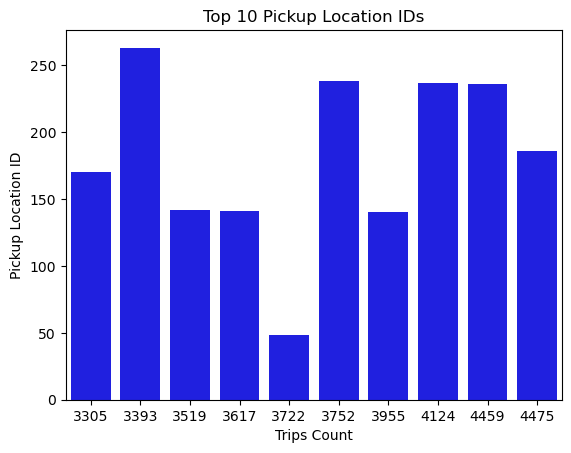

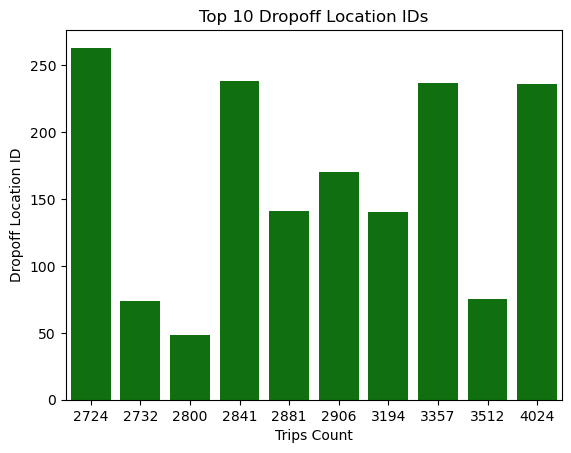

In [21]:
# Top 10 Pickup Locations (by ID)
top_pickups = merged_df['PULocationID'].value_counts().head(10)
sns.barplot(x=top_pickups.values, y=top_pickups.index, color="Blue")
plt.title("Top 10 Pickup Location IDs")
plt.xlabel("Trips Count")
plt.ylabel("Pickup Location ID")
plt.show()

# Top 10 Dropoff Locations (by ID)
top_dropoffs = merged_df['DOLocationID'].value_counts().head(10)
sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, color="Green")
plt.title("Top 10 Dropoff Location IDs")
plt.xlabel("Trips Count")
plt.ylabel("Dropoff Location ID")
plt.show()

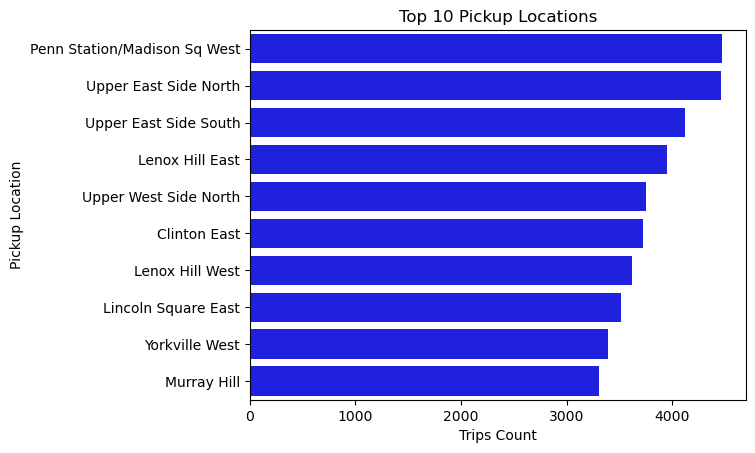

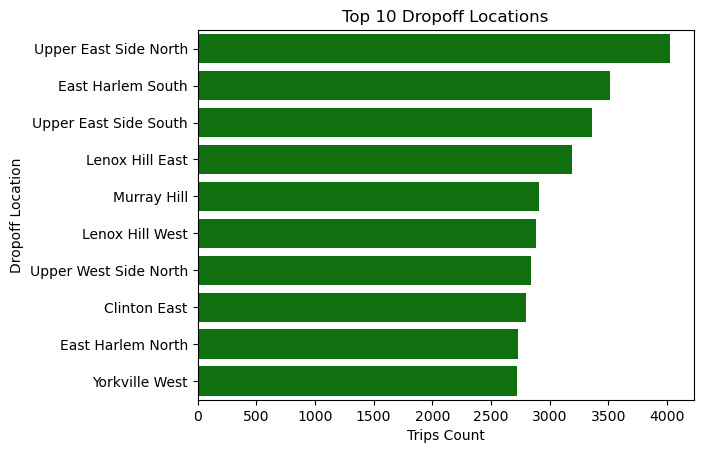

In [19]:
# Top 10 Pickup Locations (by name)
top_pickups = merged_df['Location_pickup'].value_counts().head(10)
sns.barplot(x=top_pickups.values, y=top_pickups.index, color="Blue")
plt.title("Top 10 Pickup Locations")
plt.xlabel("Trips Count")
plt.ylabel("Pickup Location")
plt.show()

# Top 10 Dropoff Locations (by name)
top_dropoffs = merged_df['Location_dropoff'].value_counts().head(10)
sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, color="Green")
plt.title("Top 10 Dropoff Locations")
plt.xlabel("Trips Count")
plt.ylabel("Dropoff Location")
plt.show()


C:\Users\91838\AppData\Local\Temp\ipykernel_14156\1757751663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hour", data=merged_df, palette="coolwarm")


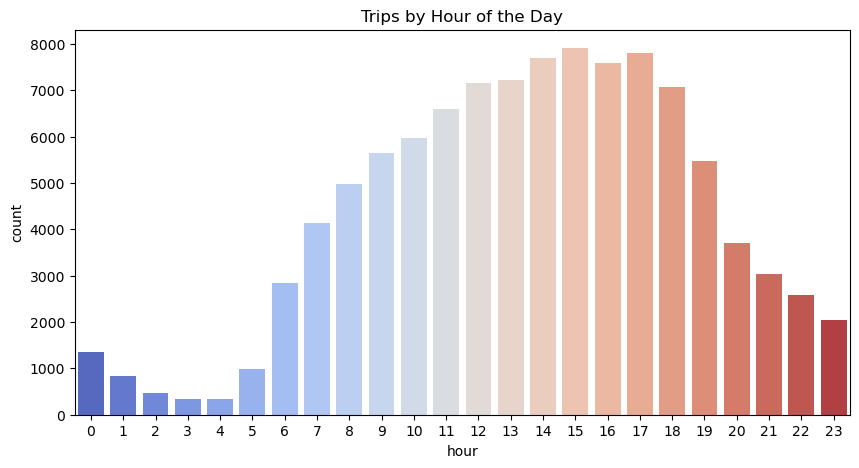

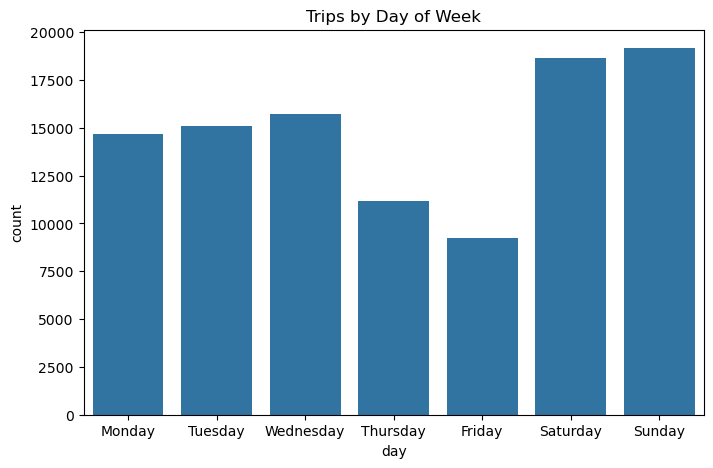

In [24]:
# Time Analysis
plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=merged_df, palette="coolwarm")
plt.title("Trips by Hour of the Day")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="day", data=merged_df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Trips by Day of Week")
plt.show()


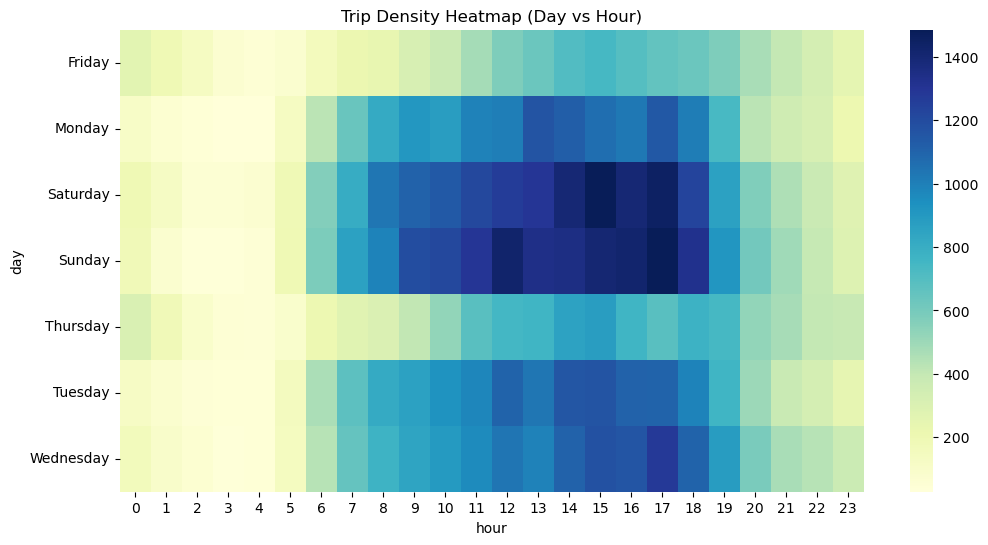

In [25]:

# Heatmap (Day vs Hour)
heatmap_data = merged_df.groupby(['day','hour']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Trip Density Heatmap (Day vs Hour)")
plt.show()

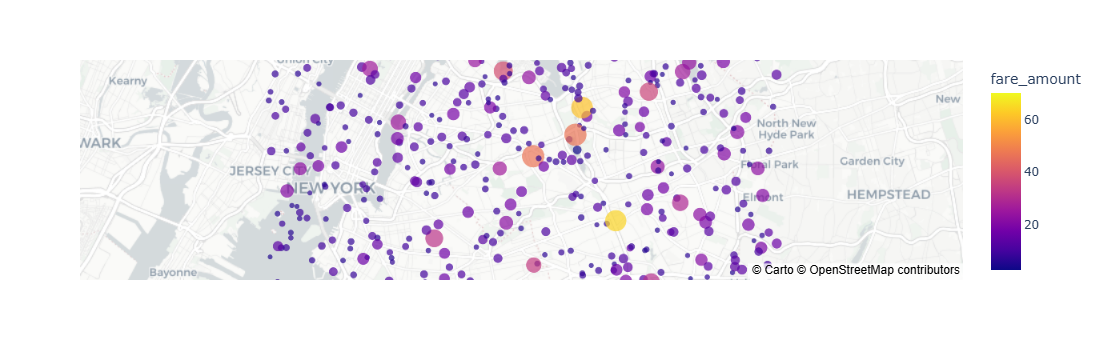

In [41]:
# Load data
trip_df = pd.read_excel("Uber Trip Details.xlsx")
location_df = pd.read_excel("Location Table.xlsx")

# Merge trip data with location names (Pickup)
trip_df = trip_df.merge(
    location_df[['LocationID', 'Location']],
    how="left",
    left_on="PULocationID",
    right_on="LocationID"
)
trip_df.rename(columns={"Location": "pickup_location"}, inplace=True)

# Merge again for Dropoff location (optional, if needed later)
trip_df = trip_df.merge(
    location_df[['LocationID', 'Location']],
    how="left",
    left_on="DOLocationID",
    right_on="LocationID"
)
trip_df.rename(columns={"Location": "dropoff_location"}, inplace=True)

# Add random lat/long (NYC bounding box)
np.random.seed(42)
trip_df['pickup_lat'] = np.random.uniform(40.55, 40.90, size=len(trip_df))
trip_df['pickup_long'] = np.random.uniform(-74.05, -73.70, size=len(trip_df))

# Convert miles → km
trip_df['distance_km'] = trip_df['trip_distance'] * 1.60934

# Map visualization
fig = px.scatter_mapbox(
    trip_df.head(1000),
    lat="pickup_lat",
    lon="pickup_long",
    hover_name="pickup_location",
    hover_data=["fare_amount", "distance_km", "dropoff_location"],
    color="fare_amount",
    size="distance_km",
    zoom=10,
    mapbox_style="carto-positron"
)
fig.show()